# Chest X-Ray Analysis and Classification of Presence of Pneumonia
![xray](data/images/xray.jpg)
<b>Authors: Marcos Panyagua, Christos Maglaras</b> <br>
Date: 04/02/2021

## Stakeholder
![guangzhou](data/images/guangzhou.jpg)

We focused on the social aspect of the application of this project and thought it would be valuable to developing nations that struggle with resources and qualified work force. Most of the time they have a lot of patients to take care of and a low number of personnel, that could lead to overworked professionals increasing the possibility of misdiagnosis and unnecessary treatment and tests. From a financial perspective it would mean a more cost-effective process, in comparison to a doctor a computer could easily be 100 times cheaper. That means more money to invest in other areas or it could also work as a tool for the radiologist/infectologist, being a first screening process.

## Data
' | '
- | -
![mendeley](data/images/mendel.jpg) | ![cell](data/images/cell.jpg)

Our dataset consists of 5856 total x-ray images, with a three to one class imbalance towards a positive result. The data is collected from the Guangzhou Women and Children’s Medical Center and sourced from Mendely Data. Visit the former here: http://en.gzfezx.net/ and the latter here: https://data.mendeley.com/datasets/rscbjbr9sj/2 . 

## Business Understanding

There are 120 million episodes of pneumonia per year in children under 5, over 10% of which (14 million) progress to severe cases. There was an estimated 880,000 deaths from pneumonia in children under the age of five in 2016. Most were less than 2 years of age. Pneumonia is the world’s leading cause of death among children under 5 years of age, accounting for 16% of all deaths of children under 5 years old, killing approximately 2,400 children a day in 2015 according to the American Thoracic Society. Also according to the society, Pneumonia is one of the top ten most expensive conditions seen during inpatient hospitalizations and in 2013, pneumonia had an aggregate cost of nearly 9.5 billion dollars. 

## Model
![network](data/images/network.jpg)

The model we have developed is a neural network tuned to image data. This is done by using Convolutional layers which are depicted in the image above. Through our iterations of improvements to the model we tuned to Activation functions, Optimizers, Resolution, image Augmentation, repeating blocks of layers and adding and removing new types of layers based on research and experimentation. 

## Takeaways

The model we have developed below can serve a highly practical service to hospitals, clinics, laboratories or any other organization that needs to have x-rays classified. Not only does the model preform well, we have also kept in mind the speed at which results are returned, as time is an important factor in medical settings. As a tool that serves radiologists, not replace them, a radiology department would be able to process many more patients at a cheaper cost. As a radiologist has two main tasks, to scan patients and to read and diagnose the scans after they are completed, lightening the load on the diagnostic side allows for much more time to be alloted for accepting new patients. This in turn lightens the load of the rest of the hospital both financially and by recources, which are the two most important factors for hospitals in developing countries.

## Contents
```
├── data
|   ├── images
|   |   ├── cell.jpg
|   |   ├── conv.mp4
|   |   ├── guangzhou.jpg
|   |   ├── imbalance.png
|   |   ├── mendel.jpg
|   |   ├── network.jpg
|   |   └── xray.jpg
|   └── dataset
|       ├── train
|       |   ├── NORMAL
|       |   └── PNEUMONIA
|       ├── val
|       |   ├── NORMAL
|       |   └── PNEUMONIA
|       └── test
|           ├── NORMAL
|           └── PNEUMONIA
├── notebooks
|   ├── christos.ipynb
|   ├── marcos_img_class.ipynb
|   └── image_class_notebook.ipynb
├── presentation.pdf
├── final_notebook.ipynb
└── README.md
```

## Prerequisites

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

from sklearn.model_selection import train_test_split

import os
import re
import sys
import cv2
import random

import keras
from keras.layers import Dense
from keras.backend import sigmoid
from keras.optimizers import Adam
from keras.applications.resnet50 import preprocess_input

import warnings
warnings.filterwarnings('ignore')

# enables hardware acceleration if possible
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)

# IMAGE PREPROCESSING

In [2]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 180
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = get_data(r'C:\Users\Chris\Documents\Flatiron\fourth_projekt\Project-The-Fourth-Pneumonia-X-Ray\data\dataset\train')
test  = get_data(r'C:\Users\Chris\Documents\Flatiron\fourth_projekt\Project-The-Fourth-Pneumonia-X-Ray\data\dataset\test')

In [4]:
train_set, val_set = train_test_split(train, test_size=0.10, random_state=22)

print("The number of files in the train set is: {}, in the validation set is: {} and in the test set is: {}"
      .format(len(train_set), len(val_set), len(test)))

The number of files in the train set is: 4244, in the validation set is: 472 and in the test set is: 624


<AxesSubplot:ylabel='count'>

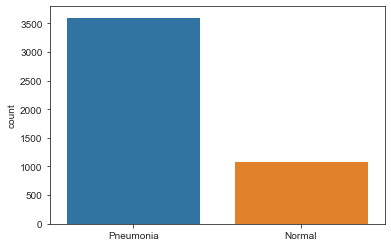

In [5]:
temp_labels = []
for i in train:
    if(i[1] == 0):
        temp_labels.append("Pneumonia")
    else:
        temp_labels.append("Normal")
sns.set_style('ticks')
sns.countplot(temp_labels)

Text(0.5, 1.0, 'PNEUMONIA')

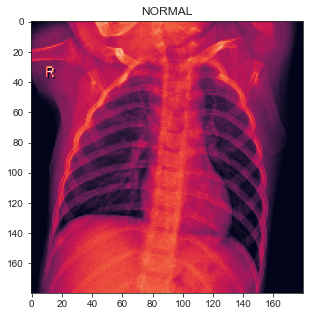

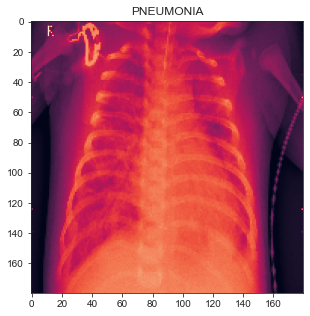

In [6]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[0][0])
plt.title(labels[train[0][1]])

In [7]:
x_train = []
y_train = []
x_test  = []
y_test  = []
x_val   = []
y_val   = []

for feature, label in train_set:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val_set:
    x_val.append(feature)
    y_val.append(label)

In [8]:
x_train = np.array(x_train) / 255
x_val   = np.array(x_val) / 255
x_test  = np.array(x_test) / 255

In [9]:
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [10]:
train_dir   = r"data/dataset/train"
class_names = ['PNEUMONIA', 'NORMAL']

# Instantiate an instance of ImageDataGenerator with some basic parameters

training_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
        rotation_range                = 30,
        zca_whitening                 = False,
        zoom_range                    = 0.2,
        width_shift_range             = 0.1,
        height_shift_range            = 0.1,
        horizontal_flip               = True,
        vertical_flip                 = False,
        )

train_generator = training_generator.flow_from_directory(train_dir,
                                                         target_size      = (96,96),
                                                         batch_size       = 32,
                                                         class_mode       = 'binary',
                                                         classes          = class_names,
                                                         shuffle          = True,
                                                        )

Found 4716 images belonging to 2 classes.


In [11]:
val_dir =  r'data/dataset/val/'

# remember not to augment the test or train data

validation_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = validation_generator.flow_from_directory(val_dir,
                                                         target_size = (96,96),
                                                         batch_size  = 32,
                                                         classes     = class_names,
                                                         class_mode  = 'binary')

Found 516 images belonging to 2 classes.


In [12]:
test_dir =  r'data/dataset/test/'

# remember not to augment the test or train data

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_generator.flow_from_directory(test_dir,
                                                    target_size = (96,96),
                                                    batch_size  = 32,
                                                    classes     = class_names,
                                                    class_mode  = 'binary')

Found 624 images belonging to 2 classes.


# END OF IMAGE PREPROCESSING

## ----------------------------------------------------------------------------------------------------------------------
# MODELING

In [13]:
#instantiate metrics
auc  = AUC()
rec  = Recall()
prec = Precision()

In [14]:
def plotter(history, epochs):
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    loss=history.history['loss']
    val_loss=history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(25, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

In [15]:
def layers1_model(epochs = 25, batch_size = 64):
    model=tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(3,3), input_shape = (96,96,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256,activation = 'relu'),
        tf.keras.layers.Dense(1,activation   = 'sigmoid')  
    ])
    
    model.compile(optimizer = tf.keras.optimizers.SGD(lr       = 0.001,
                                                      momentum = 0.01,
                                                      nesterov = True),
                  loss    = 'binary_crossentropy',
                  metrics = (['acc'], [auc], [rec], [prec]))
        
    with tf.device('/device:GPU:0'):
        history = model.fit(train_generator,
                            validation_data = val_generator,
                            epochs = epochs,
                            batch_size = batch_size,
                            verbose = 1)

    plotter(history, epochs)

Epoch 1/25
148/148 [==============================] - 65s 440ms/step - loss: 94.4292 - acc: 0.7477 - auc_33: 0.5104 - recall_38: 0.0299 - precision_29: 0.2157 - val_loss: 0.6885 - val_acc: 0.5233 - val_auc_33: 0.5056 - val_recall_38: 0.0000e+00 - val_precision_29: 0.0000e+00
Epoch 2/25
148/148 [==============================] - 63s 425ms/step - loss: 0.6720 - acc: 0.7659 - auc_33: 0.4989 - recall_38: 0.0000e+00 - precision_29: 0.0000e+00 - val_loss: 0.6883 - val_acc: 0.5233 - val_auc_33: 0.5056 - val_recall_38: 0.0000e+00 - val_precision_29: 0.0000e+00
Epoch 3/25
148/148 [==============================] - 62s 421ms/step - loss: 0.6647 - acc: 0.7661 - auc_33: 0.4940 - recall_38: 0.0000e+00 - precision_29: 0.0000e+00 - val_loss: 0.6884 - val_acc: 0.5233 - val_auc_33: 0.5056 - val_recall_38: 0.0000e+00 - val_precision_29: 0.0000e+00
Epoch 4/25
148/148 [==============================] - 63s 428ms/step - loss: 0.6557 - acc: 0.7659 - auc_33: 0.4998 - recall_38: 0.0000e+00 - precision_29: 0.0

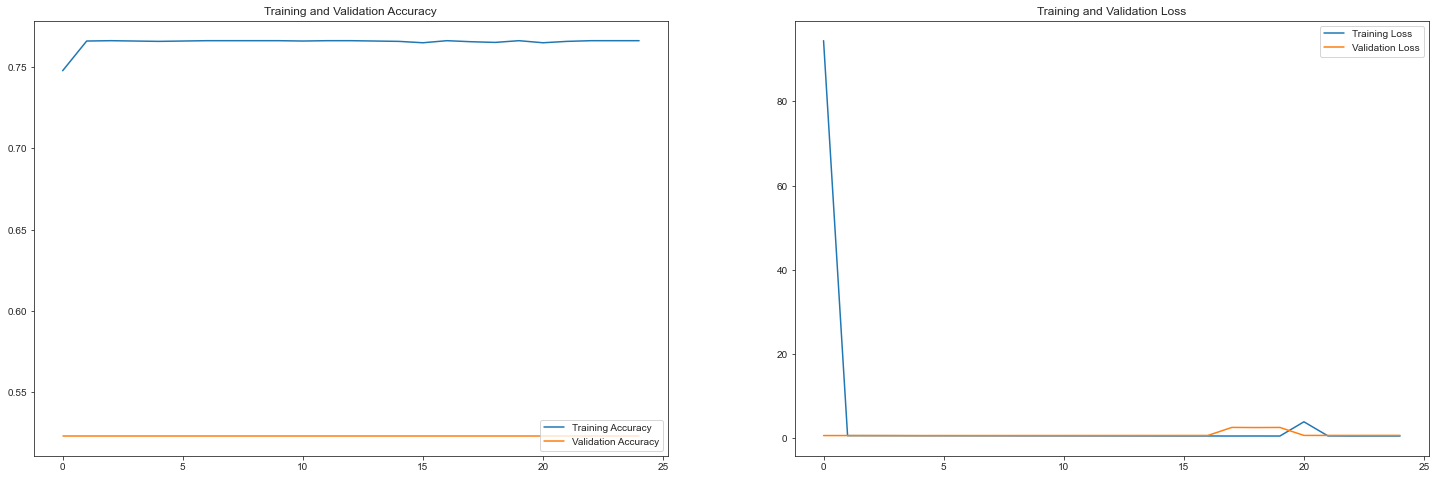

In [159]:
# Lets begin with this structure
# > best score     : N/A
# > previous score : N/A
# > new score      : loss: 0.5825 - acc: 0.7661 - auc_33: 0.5051 - recall_38: 0.0000e+00 - precision_29: 0.0000e+00 - val_loss: 0.7252 - val_acc: 0.5233 - val_auc_33: 0.5074 - val_recall_38: 0.0000e+00 - val_precision_29: 0.0000e+00
layers1_model()

In [160]:
def layers2_model(epochs = 25, batch_size = 64):
    model=tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(3,3), input_shape = (96,96,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Conv2D(256,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
          
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256,activation = 'relu'),
        tf.keras.layers.Dense(1,activation   = 'sigmoid')  
    ])
    
    model.compile(optimizer = tf.keras.optimizers.SGD(lr       = 0.001,
                                                      momentum = 0.01,
                                                      nesterov = True),
                  loss    = 'binary_crossentropy',
                  metrics = (['acc'], [auc], [rec], [prec]))
        
    with tf.device('/device:GPU:0'):
        history = model.fit(train_generator,
                            validation_data = val_generator,
                            epochs = epochs,
                            batch_size = batch_size,
                            verbose = 1)

    plotter(history, epochs)

Epoch 1/25
148/148 [==============================] - 62s 416ms/step - loss: 0.6385 - acc: 0.8206 - auc_33: 0.8043 - recall_38: 0.4485 - precision_29: 0.6348 - val_loss: 0.2680 - val_acc: 0.8857 - val_auc_33: 0.9787 - val_recall_38: 0.9837 - val_precision_29: 0.8148
Epoch 2/25
148/148 [==============================] - 58s 391ms/step - loss: 0.2774 - acc: 0.8870 - auc_33: 0.9279 - recall_38: 0.7199 - precision_29: 0.7800 - val_loss: 0.1874 - val_acc: 0.9264 - val_auc_33: 0.9834 - val_recall_38: 0.9512 - val_precision_29: 0.9000
Epoch 3/25
148/148 [==============================] - 56s 376ms/step - loss: 0.2547 - acc: 0.8972 - auc_33: 0.9399 - recall_38: 0.7425 - precision_29: 0.8029 - val_loss: 0.1796 - val_acc: 0.9264 - val_auc_33: 0.9856 - val_recall_38: 0.9634 - val_precision_29: 0.8910
Epoch 4/25
148/148 [==============================] - 56s 380ms/step - loss: 0.2364 - acc: 0.9061 - auc_33: 0.9501 - recall_38: 0.7715 - precision_29: 0.8167 - val_loss: 0.1626 - val_acc: 0.9380 - va

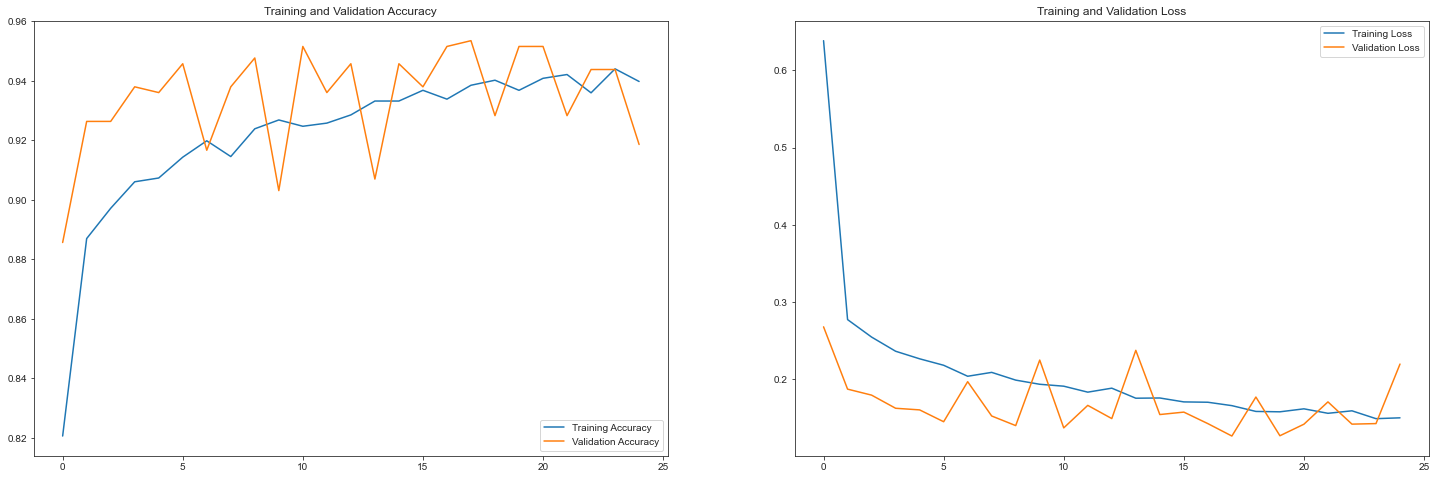

In [161]:
# Lets see how adding in a few more sets of convolutional and pooling layers
# > best score     : loss: 0.5825 - acc: 0.7661 - auc_33: 0.5051 - recall_38: 0.0000e+00 - precision_29: 0.0000e+00 - val_loss: 0.7252 - val_acc: 0.5233 - val_auc_33: 0.5074 - val_recall_38: 0.0000e+00 - val_precision_29: 0.0000e+00
# > previous score : loss: 0.5825 - acc: 0.7661 - auc_33: 0.5051 - recall_38: 0.0000e+00 - precision_29: 0.0000e+00 - val_loss: 0.7252 - val_acc: 0.5233 - val_auc_33: 0.5074 - val_recall_38: 0.0000e+00 - val_precision_29: 0.0000e+00
# > new score      : loss: 0.1502 - acc: 0.9398 - auc_33: 0.9801 - recall_38: 0.8604     - precision_29: 0.8795     - val_loss: 0.2198 - val_acc: 0.9186 - val_auc_33: 0.9897 - val_recall_38: 0.8293     - val_precision_29: 1.0000
# quite the improvement, this is our new recordholder
layers2_model()

In [16]:
def layers3_model(epochs = 25, batch_size = 64):
    model=tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(3,3), input_shape = (96,96,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
    
        tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
    
        tf.keras.layers.Conv2D(256,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
          
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256,activation = 'relu'),
        tf.keras.layers.Dense(1,activation   = 'sigmoid')  
    ])
    
    model.compile(optimizer = tf.keras.optimizers.SGD(lr       = 0.001,
                                                      momentum = 0.01,
                                                      nesterov = True),
                  loss    = 'binary_crossentropy',
                  metrics = (['acc'], [auc], [rec], [prec]))
        

        
    with tf.device('/device:GPU:0'):
        history = model.fit(train_generator,
                            validation_data = val_generator,
                            epochs = epochs,
                            batch_size = batch_size,
                            verbose = 1)

    plotter(history, epochs)

In [18]:
# dropout layers can help immensly in overfitting reduction, lets add a few in.
# > best score     : loss: 0.1502 - acc: 0.9398 - auc_33: 0.9801 - recall_38: 0.8604 - precision_29: 0.8795 - val_loss: 0.2198 - val_acc: 0.9186 - val_auc_33: 0.9897 - val_recall_38: 0.8293 - val_precision_29: 1.0000
# > previous score : loss: 0.1502 - acc: 0.9398 - auc_33: 0.9801 - recall_38: 0.8604 - precision_29: 0.8795 - val_loss: 0.2198 - val_acc: 0.9186 - val_auc_33: 0.9897 - val_recall_38: 0.8293 - val_precision_29: 1.0000
# > new score      : loss: 0.2077 - acc: 0.9156 - auc: 0.9612    - recall: 0.8150    - precision: 0.8225    - val_loss: 0.1964 - val_acc: 0.9109 - val_auc: 0.9877    - val_recall: 0.9675    - val_precision: 0.8623
# aulthough the dropout layers caused the score to drop dramatically, the validation recall has increased dramatically while 
#        the precision has dropped. This is equivalent to a better f1 score as precision was previously = 1
layers3_model()

Epoch 1/25
 25/148 [====>.........................] - ETA: 32s - loss: 2.4447 - acc: 0.6662 - auc: 0.7536 - recall: 0.6667 - precision: 0.6272

KeyboardInterrupt: 

## Optimizers: SGD vs. RMS vs. Adadelta vs. Nadam

In [19]:
# the function below makes it possible to adopt these four different optimizer as well as activation functions

In [22]:
def first_model(activation = 'relu', last_activation = 'sigmoid', optimizer = 'SGD', epochs = 25, batch_size = 64):
    model=tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(3,3), input_shape = (96,96,3), activation = activation),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Conv2D(64,(3,3), activation = activation),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
    
        tf.keras.layers.Conv2D(128,(3,3), activation = activation),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
    
        tf.keras.layers.Conv2D(256,(3,3), activation = activation),
        tf.keras.layers.MaxPooling2D(2,2),
          
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256,activation = activation),
        tf.keras.layers.Dense(1,activation   = last_activation)  
    ])
    
    if optimizer == 'SGD':
        model.compile(optimizer = tf.keras.optimizers.SGD(lr       = 0.001,
                                                          momentum = 0.01,
                                                          nesterov = True),
                      loss    = 'binary_crossentropy',
                      metrics = (['acc'], [auc], [rec], [prec]))
        
    elif optimizer == 'Adadelta':
        model.compile(optimizer = tf.keras.optimizers.Adadelta(lr      = 0.0001,
                                                               rho     = 0.95,
                                                               epsilon = 1e-08,
                                                               decay   = 0.0),
                      loss    = 'binary_crossentropy',
                      metrics = (['acc'], [auc], [rec], [prec]))
        
    elif optimizer == 'RMS':
        model.compile(optimizer = tf.keras.optimizers.RMSprop(lr      = 0.001,
                                                              rho     = 0.90,
                                                              epsilon = 1e-08,
                                                              decay   = 0.0),
                      loss    = 'binary_crossentropy',
                      metrics = (['acc'], [auc], [rec], [prec]))
        
    elif optimizer == 'Nadam':
        model.compile(optimizer = tf.keras.optimizers.Nadam(lr      = 0.0001,
                                                            beta_1  = 0.9,
                                                            beta_2  = 0.999,
                                                            epsilon = 1e-08,
                                                            decay   = 0.0),
                      loss    = 'binary_crossentropy',
                      metrics = (['acc'], [auc], [rec], [prec]))
    else:
        print('Invalid Compiler')
        
    with tf.device('/device:GPU:0'):
        history = model.fit(train_generator,
                            validation_data = val_generator,
                            epochs = epochs,
                            batch_size = batch_size,
                            verbose = 1)

    plotter(history, epochs)

In [23]:
# We have already run the model using SGD above, so the score remains the same
# > best score     : loss: 0.1502 - acc: 0.9398 - auc_33: 0.9801 - recall_38: 0.8604 - precision_29: 0.8795 - val_loss: 0.2198 - val_acc: 0.9186 - val_auc_33: 0.9897 - val_recall_38: 0.8293 - val_precision_29: 1.0000
# > previous score : loss: 0.2077 - acc: 0.9156 - auc: 0.9612    - recall: 0.8150    - precision: 0.8225    - val_loss: 0.1964 - val_acc: 0.9109 - val_auc: 0.9877    - val_recall: 0.9675    - val_precision: 0.8623
# > new score      : loss: 0.2077 - acc: 0.9156 - auc: 0.9612    - recall: 0.8150    - precision: 0.8225    - val_loss: 0.1964 - val_acc: 0.9109 - val_auc: 0.9877    - val_recall: 0.9675    - val_precision: 0.8623
first_model(optimizer = 'SGD')

Epoch 1/25
 69/148 [============>.................] - ETA: 20s - loss: 1.4228 - acc: 0.7269 - auc: 0.6750 - recall: 0.4681 - precision: 0.5104

KeyboardInterrupt: 

Epoch 1/25
148/148 [==============================] - 47s 315ms/step - loss: 5.4652 - acc: 0.7621 - auc: 0.5529 - recall: 0.2186 - precision: 0.4972 - val_loss: 6.1511 - val_acc: 0.5233 - val_auc: 0.4481 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/25
148/148 [==============================] - 45s 304ms/step - loss: 4.9858 - acc: 0.7621 - auc: 0.4923 - recall: 0.0145 - precision: 0.3137 - val_loss: 5.5185 - val_acc: 0.5233 - val_auc: 0.4186 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/25
148/148 [==============================] - 44s 298ms/step - loss: 4.5781 - acc: 0.7557 - auc: 0.4881 - recall: 0.0163 - precision: 0.2118 - val_loss: 4.8810 - val_acc: 0.5233 - val_auc: 0.4036 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/25
148/148 [==============================] - 44s 298ms/step - loss: 4.0534 - acc: 0.7443 - auc: 0.4823 - recall: 0.0227 - precision: 0.1634 - val_loss: 4.2852 - val_acc: 0.5194 - val_auc: 0.3943 - val_recall: 0.0000e+00 

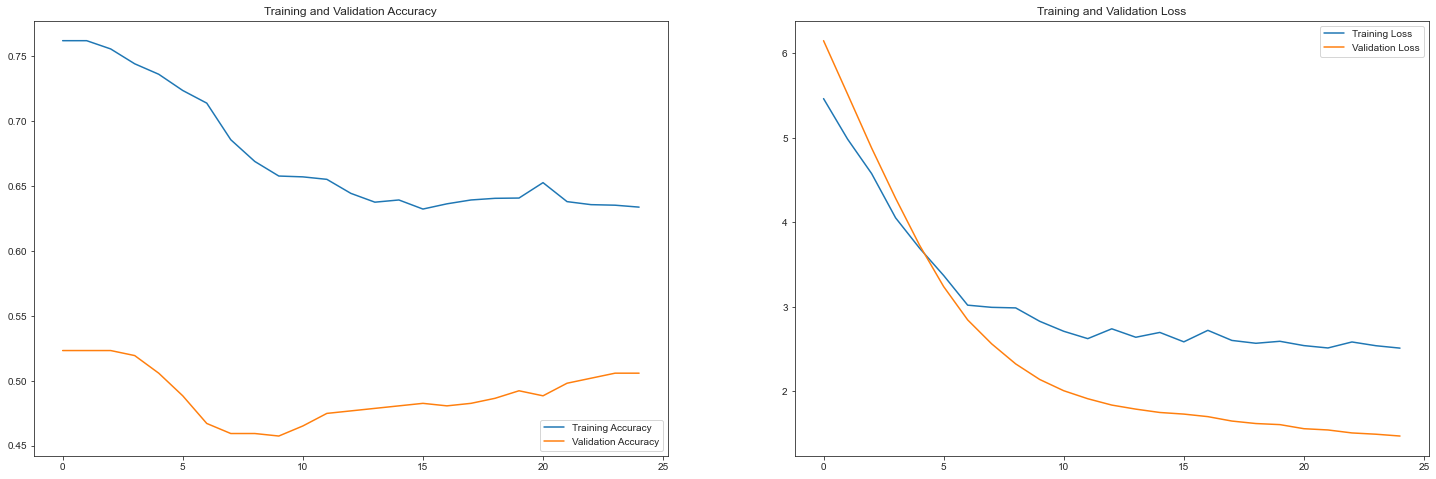

In [24]:
# Lets try Adadelta next
# > best score     : loss: 0.1502 - acc: 0.9398 - auc_33: 0.9801 - recall_38: 0.8604 - precision_29: 0.8795 - val_loss: 0.2198 - val_acc: 0.9186 - val_auc_33: 0.9897 - val_recall_38: 0.8293 - val_precision_29: 1.0000
# > previous score : loss: 0.2077 - acc: 0.9156 - auc: 0.9612    - recall: 0.8150    - precision: 0.8225    - val_loss: 0.1964 - val_acc: 0.9109 - val_auc: 0.9877    - val_recall: 0.9675    - val_precision: 0.8623
# > new score      : loss: 2.5111 - acc: 0.6338 - auc: 0.4858    - recall: 0.2348    - precision: 0.2268    - val_loss: 1.4704 - val_acc: 0.5058 - val_auc: 0.5467    - val_recall: 0.1341    - val_precision: 0.4400
# a definite loss in performance, especially on the validation set. The optimizer may need to be tuned but for now lets move on
first_model(optimizer = 'Adadelta')

Epoch 1/25
148/148 [==============================] - 45s 306ms/step - loss: 7.2849 - acc: 0.7313 - auc: 0.6013 - recall: 0.2950 - precision: 0.4107 - val_loss: 0.4478 - val_acc: 0.8760 - val_auc: 0.9624 - val_recall: 0.9593 - val_precision: 0.8138
Epoch 2/25
148/148 [==============================] - 45s 306ms/step - loss: 0.4402 - acc: 0.8340 - auc: 0.8392 - recall: 0.6428 - precision: 0.6457 - val_loss: 0.2243 - val_acc: 0.9128 - val_auc: 0.9728 - val_recall: 0.8943 - val_precision: 0.9205
Epoch 3/25
148/148 [==============================] - 45s 303ms/step - loss: 0.3688 - acc: 0.8683 - auc: 0.8950 - recall: 0.7180 - precision: 0.7187 - val_loss: 0.3020 - val_acc: 0.8934 - val_auc: 0.9802 - val_recall: 0.8049 - val_precision: 0.9659
Epoch 4/25
148/148 [==============================] - 45s 307ms/step - loss: 0.3256 - acc: 0.8849 - auc: 0.9154 - recall: 0.7398 - precision: 0.7612 - val_loss: 0.3061 - val_acc: 0.8895 - val_auc: 0.9807 - val_recall: 0.9797 - val_precision: 0.8225
Epoc

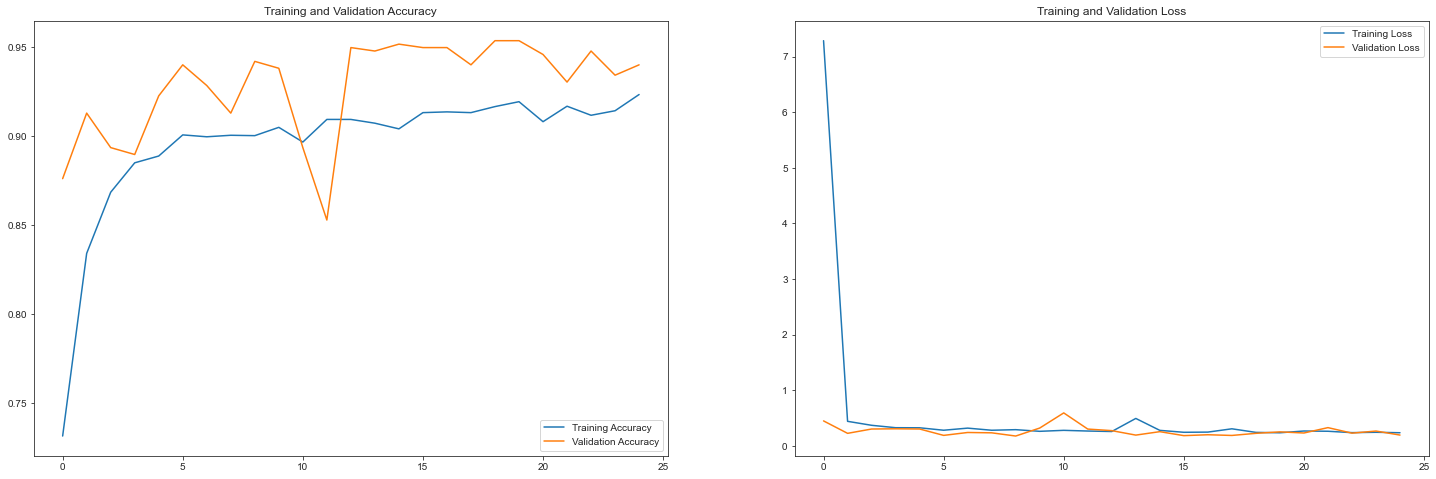

In [25]:
# Lets try RMS now
# > best score     : loss: 0.1502 - acc: 0.9398 - auc_33: 0.9801 - recall_38: 0.8604 - precision_29: 0.8795 - val_loss: 0.2198 - val_acc: 0.9186 - val_auc_33: 0.9897 - val_recall_38: 0.8293 - val_precision_29: 1.0000
# > previous score : loss: 2.5111 - acc: 0.6338 - auc: 0.4858    - recall: 0.2348    - precision: 0.2268    - val_loss: 1.4704 - val_acc: 0.5058 - val_auc: 0.5467    - val_recall: 0.1341    - val_precision: 0.4400
# > new score      : loss: 0.2350 - acc: 0.9232 - auc: 0.9536    - recall: 0.8268    - precision: 0.8421    - val_loss: 0.1931 - val_acc: 0.9399 - val_auc: 0.9862    - val_recall: 0.9350    - val_precision: 0.9388
# RMS is our best so far, it performs worse on the training data than SGD but better on the validation data
first_model(optimizer = 'RMS')

Epoch 1/25
148/148 [==============================] - 48s 323ms/step - loss: 0.9773 - acc: 0.7585 - auc: 0.7557 - recall: 0.5530 - precision: 0.5712 - val_loss: 0.2614 - val_acc: 0.9012 - val_auc: 0.9700 - val_recall: 0.8659 - val_precision: 0.9221
Epoch 2/25
148/148 [==============================] - 48s 321ms/step - loss: 0.3696 - acc: 0.8524 - auc: 0.8850 - recall: 0.6528 - precision: 0.6970 - val_loss: 0.2381 - val_acc: 0.9128 - val_auc: 0.9825 - val_recall: 0.9756 - val_precision: 0.8602
Epoch 3/25
148/148 [==============================] - 48s 321ms/step - loss: 0.2993 - acc: 0.8817 - auc: 0.9220 - recall: 0.7108 - precision: 0.7664 - val_loss: 0.2383 - val_acc: 0.9109 - val_auc: 0.9789 - val_recall: 0.9593 - val_precision: 0.8676
Epoch 4/25
148/148 [==============================] - 47s 319ms/step - loss: 0.2688 - acc: 0.8878 - auc: 0.9365 - recall: 0.7335 - precision: 0.7749 - val_loss: 0.1878 - val_acc: 0.9419 - val_auc: 0.9815 - val_recall: 0.9472 - val_precision: 0.9320
Epoc

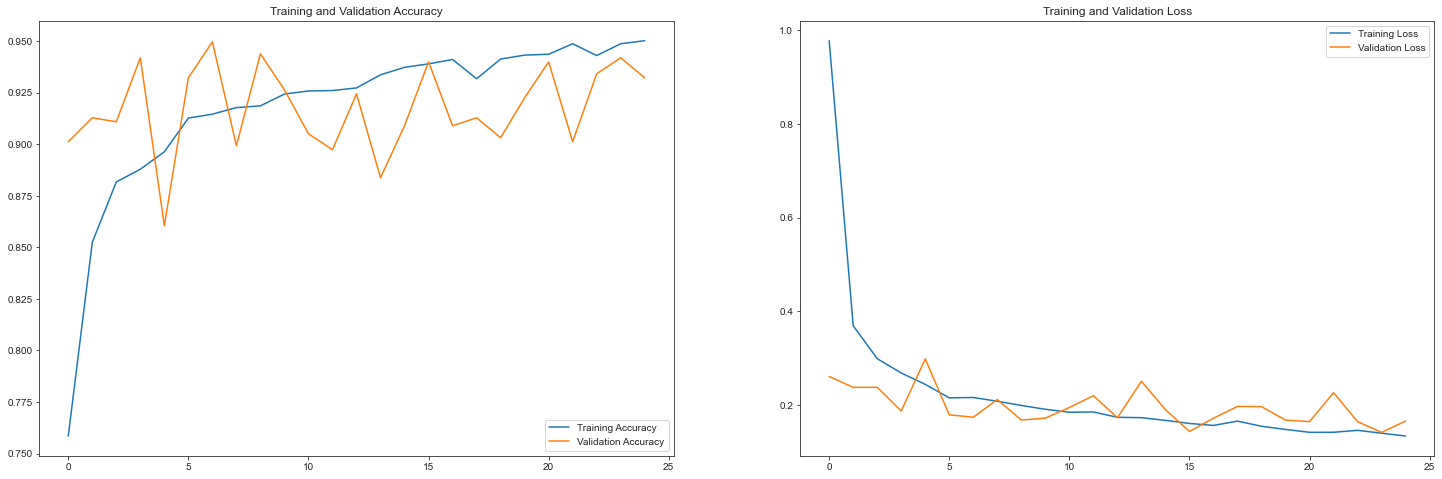

In [30]:
# Nadam seems to work much better than the rest. lets stick to this compiler
# > best score     : loss: 0.2350 - acc: 0.9232 - auc: 0.9536 - recall: 0.8268 - precision: 0.8421 - val_loss: 0.1931 - val_acc: 0.9399 - val_auc: 0.9862 - val_recall: 0.9350 - val_precision: 0.9388
# > previous score : loss: 0.2350 - acc: 0.9232 - auc: 0.9536 - recall: 0.8268 - precision: 0.8421 - val_loss: 0.1931 - val_acc: 0.9399 - val_auc: 0.9862 - val_recall: 0.9350 - val_precision: 0.9388
# > new score      : loss: 0.1344 - acc: 0.9502 - auc: 0.9821 - recall: 0.8894 - precision: 0.8967 - val_loss: 0.1663 - val_acc: 0.9322 - val_auc: 0.9893 - val_recall: 0.9756 - val_precision: 0.8922
# Nadam seems to do slightly better all-round
first_model(optimizer = 'Nadam')

## Activation Functions: Sigmoid vs. ReLu vs. Swish

In [26]:
# swish is a recent activation function that is said to remedy the issues of ReLU. Lets put it to the test
def swish(x, b = 1):
    return (x * sigmoid(b * x))

Epoch 1/25
148/148 [==============================] - 46s 311ms/step - loss: 0.5561 - acc: 0.7661 - auc: 0.6112 - recall: 0.1705 - precision: 0.9388 - val_loss: 0.8739 - val_acc: 0.5233 - val_auc: 0.5707 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/25
148/148 [==============================] - 45s 304ms/step - loss: 0.5483 - acc: 0.7661 - auc: 0.5210 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.7066 - val_acc: 0.5233 - val_auc: 0.8511 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/25
148/148 [==============================] - 45s 303ms/step - loss: 0.4864 - acc: 0.7648 - auc: 0.7385 - recall: 0.0417 - precision: 0.4694 - val_loss: 0.5596 - val_acc: 0.5795 - val_auc: 0.9179 - val_recall: 0.1382 - val_precision: 0.8718
Epoch 4/25
148/148 [==============================] - 45s 304ms/step - loss: 0.3980 - acc: 0.8132 - auc: 0.8464 - recall: 0.3772 - precision: 0.6820 - val_loss: 0.3424 - val_acc: 0.8837 - val_auc: 0.9571 - val_recall: 0.8577 - va

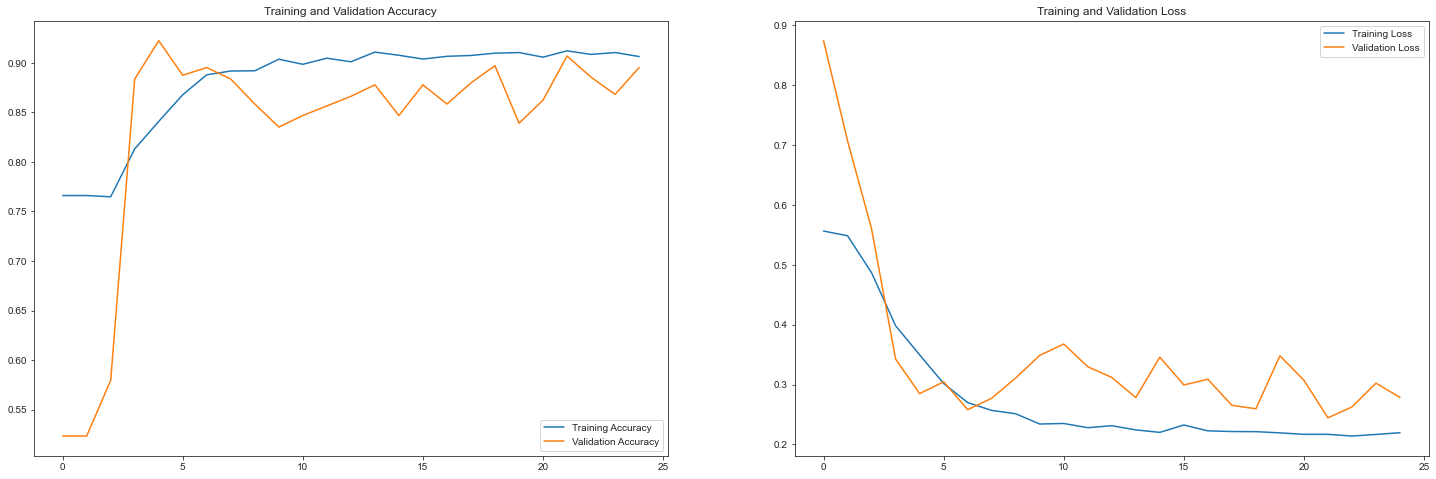

In [27]:
# ReLU is known to work better than sigmoid in most cases, lets try nonetheless
# > best score     : loss: 0.1344 - acc: 0.9502 - auc: 0.9821 - recall: 0.8894 - precision: 0.8967 - val_loss: 0.1663 - val_acc: 0.9322 - val_auc: 0.9893 - val_recall: 0.9756 - val_precision: 0.8922
# > previous score : loss: 0.1344 - acc: 0.9502 - auc: 0.9821 - recall: 0.8894 - precision: 0.8967 - val_loss: 0.1663 - val_acc: 0.9322 - val_auc: 0.9893 - val_recall: 0.9756 - val_precision: 0.8922
# > new score      : loss: 0.2196 - acc: 0.9065 - auc: 0.9575 - recall: 0.8141 - precision: 0.7919 - val_loss: 0.2785 - val_acc: 0.8953 - val_auc: 0.9626 - val_recall: 0.8577 - val_precision: 0.9174
# Ta big drop across all metrics, not good
first_model(optimizer = 'Nadam', activation = 'sigmoid')

Epoch 1/25
148/148 [==============================] - 45s 303ms/step - loss: 0.9985 - acc: 0.7689 - auc: 0.7603 - recall: 0.5582 - precision: 0.5788 - val_loss: 0.2417 - val_acc: 0.9264 - val_auc: 0.9749 - val_recall: 0.8943 - val_precision: 0.9483
Epoch 2/25
148/148 [==============================] - 44s 299ms/step - loss: 0.3411 - acc: 0.8634 - auc: 0.9021 - recall: 0.6818 - precision: 0.7196 - val_loss: 0.2334 - val_acc: 0.9167 - val_auc: 0.9803 - val_recall: 0.9837 - val_precision: 0.8612
Epoch 3/25
148/148 [==============================] - 44s 300ms/step - loss: 0.2785 - acc: 0.8906 - auc: 0.9327 - recall: 0.7425 - precision: 0.7793 - val_loss: 0.2253 - val_acc: 0.9167 - val_auc: 0.9763 - val_recall: 0.9675 - val_precision: 0.8718
Epoch 4/25
148/148 [==============================] - 44s 301ms/step - loss: 0.2539 - acc: 0.8993 - auc: 0.9435 - recall: 0.7625 - precision: 0.7979 - val_loss: 0.2110 - val_acc: 0.9109 - val_auc: 0.9828 - val_recall: 0.9715 - val_precision: 0.8597
Epoc

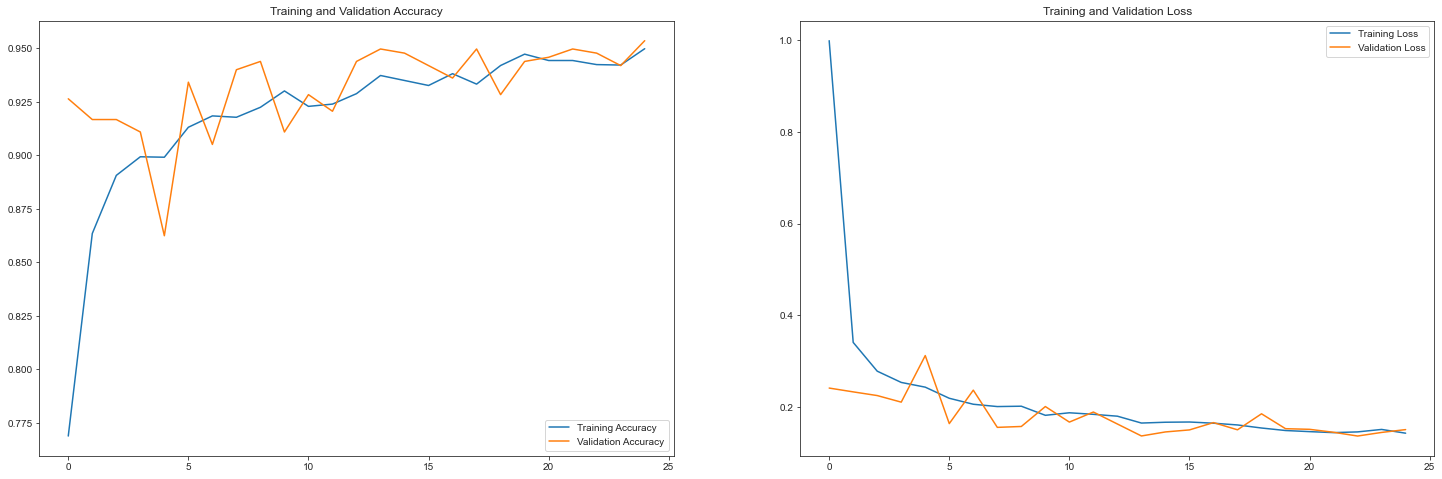

In [28]:
# We already know ReLU will score higer from the results of the previous section
# > best score     : loss: 0.1344 - acc: 0.9502 - auc: 0.9821 - recall: 0.8894 - precision: 0.8967 - val_loss: 0.1663 - val_acc: 0.9322 - val_auc: 0.9893 - val_recall: 0.9756 - val_precision: 0.8922
# > previous score : loss: 0.2196 - acc: 0.9065 - auc: 0.9575 - recall: 0.8141 - precision: 0.7919 - val_loss: 0.2785 - val_acc: 0.8953 - val_auc: 0.9626 - val_recall: 0.8577 - val_precision: 0.9174
# > new score      : loss: 0.1433 - acc: 0.9497 - auc: 0.9813 - recall: 0.8876 - precision: 0.8965 - val_loss: 0.1512 - val_acc: 0.9535 - val_auc: 0.9896 - val_recall: 0.9593 - val_precision: 0.9440
first_model(optimizer = 'Nadam', activation = 'relu')

Epoch 1/25
148/148 [==============================] - 47s 317ms/step - loss: 1.0606 - acc: 0.7716 - auc: 0.7794 - recall: 0.6019 - precision: 0.5854 - val_loss: 0.3595 - val_acc: 0.8702 - val_auc: 0.9568 - val_recall: 0.9553 - val_precision: 0.8076
Epoch 2/25
148/148 [==============================] - 45s 304ms/step - loss: 0.3736 - acc: 0.8605 - auc: 0.8883 - recall: 0.6800 - precision: 0.7109 - val_loss: 0.2245 - val_acc: 0.9109 - val_auc: 0.9732 - val_recall: 0.9431 - val_precision: 0.8788
Epoch 3/25
148/148 [==============================] - 45s 303ms/step - loss: 0.3036 - acc: 0.8757 - auc: 0.9235 - recall: 0.6963 - precision: 0.7537 - val_loss: 0.2015 - val_acc: 0.9283 - val_auc: 0.9778 - val_recall: 0.9472 - val_precision: 0.9066
Epoch 4/25
148/148 [==============================] - 45s 302ms/step - loss: 0.2644 - acc: 0.8914 - auc: 0.9378 - recall: 0.7443 - precision: 0.7812 - val_loss: 0.2437 - val_acc: 0.9205 - val_auc: 0.9791 - val_recall: 0.8537 - val_precision: 0.9767
Epoc

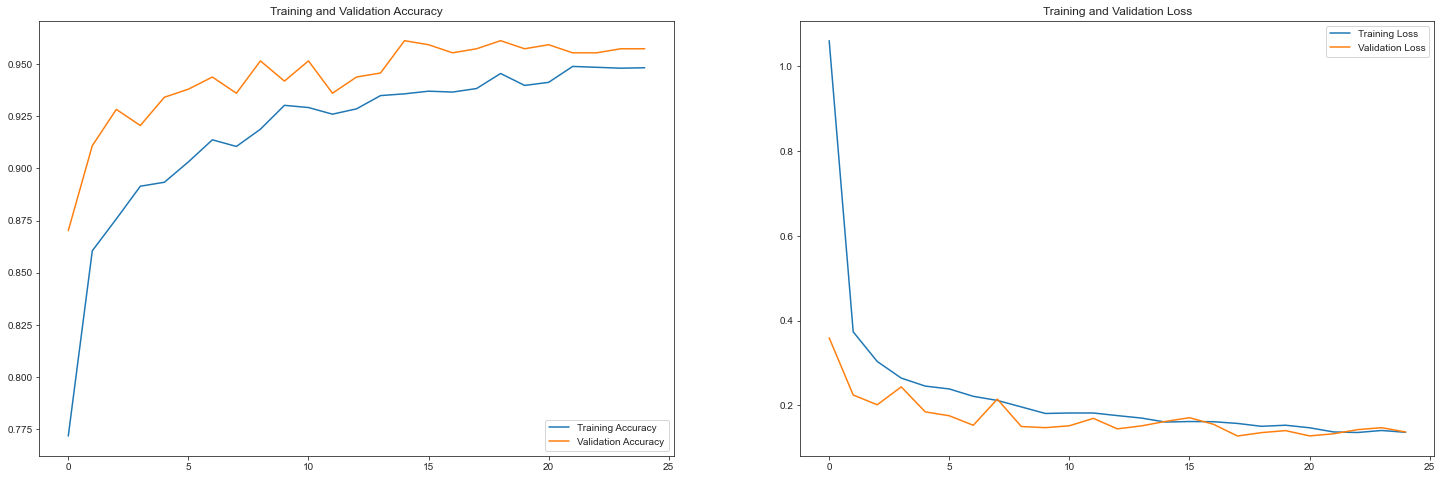

In [31]:
# Lets see if swish can do even better
# > best score     : loss: 0.1433 - acc: 0.9497 - auc: 0.9813 - recall: 0.8876 - precision: 0.8965 - val_loss: 0.1512 - val_acc: 0.9535 - val_auc: 0.9896 - val_recall: 0.9593 - val_precision: 0.9440
# > previous score : loss: 0.1433 - acc: 0.9497 - auc: 0.9813 - recall: 0.8876 - precision: 0.8965 - val_loss: 0.1512 - val_acc: 0.9535 - val_auc: 0.9896 - val_recall: 0.9593 - val_precision: 0.9440
# > new score      : loss: 0.1365 - acc: 0.9483 - auc: 0.9829 - recall: 0.8812 - precision: 0.8959 - val_loss: 0.1372 - val_acc: 0.9574 - val_auc: 0.9900 - val_recall: 0.9309 - val_precision: 0.9786
# looks like there is less overfitting now
first_model(optimizer = 'Nadam', activation = 'swish')

In [ ]:
# looks like Nadam and Swish are the best in this scenario
# In our second model lets remove these features as varaibles and add variability to our ImageDataGenerator

In [32]:
def second_model(activation = 'swish', last_activation = 'sigmoid', epochs = 25,
                batch_size = 64, vert_flip = False, horiz_flip = True, zca = False,
                zoom = .2, rotate = 30, width_shift = .1, height_shift = .1, shuffle = True):
    
    training_generator = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        zca_whitening                 = zca,
        rotation_range                = rotate,
        zoom_range                    = zoom,
        width_shift_range             = width_shift,
        height_shift_range            = height_shift,
        horizontal_flip               = horiz_flip,
        vertical_flip                 = vert_flip,
        )

    train_generator = training_generator.flow_from_directory(train_dir,
                                                             target_size      = (96,96),
                                                             batch_size       = 32,
                                                             class_mode       = 'binary',
                                                             classes          = class_names,
                                                             shuffle          = True,
                                                        )
    
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(3,3), input_shape = (96,96,3), activation = activation),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Conv2D(64,(3,3), activation = activation),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
    
        tf.keras.layers.Conv2D(128,(3,3), activation = activation),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
    
        tf.keras.layers.Conv2D(256,(3,3), activation = activation),
        tf.keras.layers.MaxPooling2D(2,2),
          
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256,activation = activation),
        tf.keras.layers.Dense(1,activation   = last_activation)  
    ])
        
    model.compile(optimizer = tf.keras.optimizers.Nadam(lr      = 0.0001,
                                                        beta_1  = 0.9,
                                                        beta_2  = 0.999,
                                                        epsilon = 1e-08,
                                                        decay   = 0.0),
                  loss    = 'binary_crossentropy',
                  metrics = (['acc'], [auc], [rec], [prec]))
        
    with tf.device('/device:GPU:0'):
        history = model.fit(train_generator,
                            validation_data = val_generator,
                            epochs          = epochs,
                            batch_size      = batch_size,
                            verbose         = 1)
    
    plotter(history, epochs)

# Testing augmentation parameters

Found 4716 images belonging to 2 classes.
Epoch 1/25
148/148 [==============================] - 46s 313ms/step - loss: 1.1361 - acc: 0.7729 - auc: 0.7704 - recall: 0.5856 - precision: 0.5967 - val_loss: 0.2508 - val_acc: 0.9070 - val_auc: 0.9697 - val_recall: 0.9512 - val_precision: 0.8667
Epoch 2/25
148/148 [==============================] - 45s 307ms/step - loss: 0.3588 - acc: 0.8562 - auc: 0.9019 - recall: 0.6673 - precision: 0.7030 - val_loss: 0.2078 - val_acc: 0.9322 - val_auc: 0.9766 - val_recall: 0.9512 - val_precision: 0.9105
Epoch 3/25
148/148 [==============================] - 45s 303ms/step - loss: 0.2942 - acc: 0.8834 - auc: 0.9280 - recall: 0.7189 - precision: 0.7677 - val_loss: 0.3130 - val_acc: 0.8702 - val_auc: 0.9801 - val_recall: 0.9878 - val_precision: 0.7915
Epoch 4/25
148/148 [==============================] - 46s 308ms/step - loss: 0.2686 - acc: 0.8950 - auc: 0.9365 - recall: 0.7498 - precision: 0.7906 - val_loss: 0.2244 - val_acc: 0.9050 - val_auc: 0.9817 - val_r

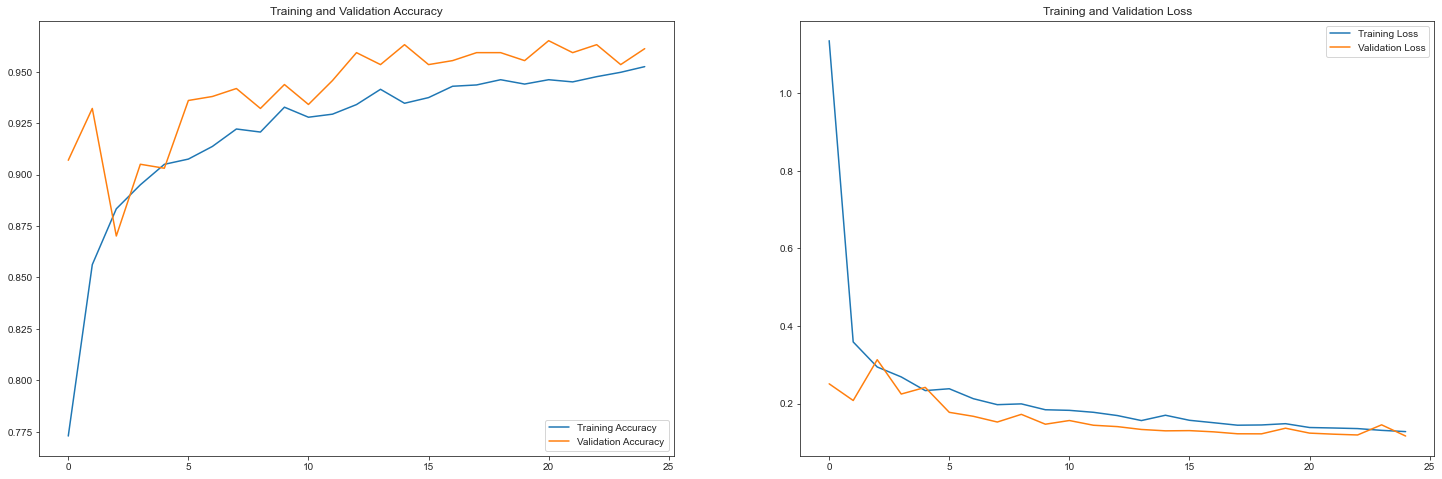

In [33]:
# Lets see if my guess of enabling horizontal flipping from the beginning was correct
# > best score     : loss: 0.1365 - acc: 0.9483 - auc: 0.9829 - recall: 0.8812 - precision: 0.8959 - val_loss: 0.1372 - val_acc: 0.9574 - val_auc: 0.9900 - val_recall: 0.9309 - val_precision: 0.9786
# > previous score : loss: 0.1365 - acc: 0.9483 - auc: 0.9829 - recall: 0.8812 - precision: 0.8959 - val_loss: 0.1372 - val_acc: 0.9574 - val_auc: 0.9900 - val_recall: 0.9309 - val_precision: 0.9786.9440
# > new score      : loss: 0.1275 - acc: 0.9525 - auc: 0.9847 - recall: 0.8912 - precision: 0.9043 - val_loss: 0.1161 - val_acc: 0.9612 - val_auc: 0.9919 - val_recall: 0.9512 - val_precision: 0.9669
# I guessed wrong it seems, the validation data scores better in each metric
second_model(horiz_flip = False)

Found 4716 images belonging to 2 classes.
Epoch 1/25
148/148 [==============================] - 45s 305ms/step - loss: 1.0230 - acc: 0.7731 - auc: 0.7799 - recall: 0.5908 - precision: 0.5970 - val_loss: 0.2255 - val_acc: 0.9186 - val_auc: 0.9738 - val_recall: 0.9268 - val_precision: 0.9048
Epoch 2/25
148/148 [==============================] - 45s 302ms/step - loss: 0.3599 - acc: 0.8611 - auc: 0.9028 - recall: 0.6899 - precision: 0.7086 - val_loss: 0.2367 - val_acc: 0.9186 - val_auc: 0.9833 - val_recall: 0.8618 - val_precision: 0.9636
Epoch 3/25
148/148 [==============================] - 45s 302ms/step - loss: 0.3058 - acc: 0.8726 - auc: 0.9231 - recall: 0.6999 - precision: 0.7409 - val_loss: 0.2643 - val_acc: 0.8915 - val_auc: 0.9815 - val_recall: 0.9878 - val_precision: 0.8209
Epoch 4/25
148/148 [==============================] - 45s 307ms/step - loss: 0.2642 - acc: 0.8846 - auc: 0.9408 - recall: 0.7335 - precision: 0.7639 - val_loss: 0.2098 - val_acc: 0.9302 - val_auc: 0.9799 - val_r

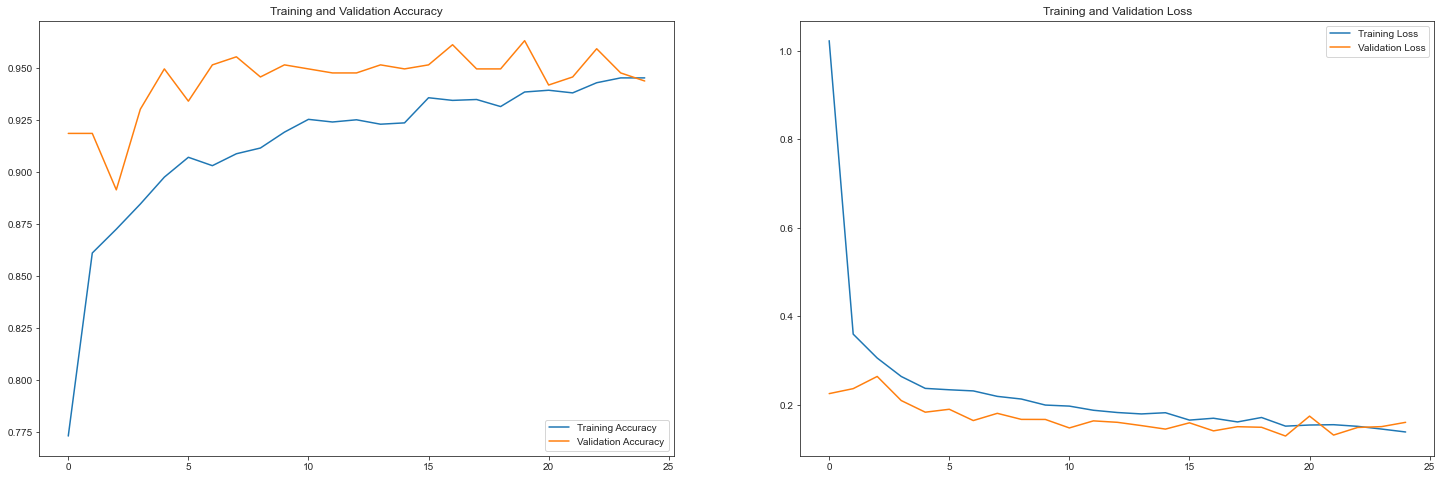

In [34]:
# Since I guessed wrong on horizontal flipping, lets go against intuition and set vertical flipping to true
# > best score     : loss: 0.1275 - acc: 0.9525 - auc: 0.9847 - recall: 0.8912 - precision: 0.9043 - val_loss: 0.1161 - val_acc: 0.9612 - val_auc: 0.9919 - val_recall: 0.9512 - val_precision: 0.9669
# > previous score : loss: 0.1275 - acc: 0.9525 - auc: 0.9847 - recall: 0.8912 - precision: 0.9043 - val_loss: 0.1161 - val_acc: 0.9612 - val_auc: 0.9919 - val_recall: 0.9512 - val_precision: 0.9669
# > new score      : loss: 0.1388 - acc: 0.9453 - auc: 0.9824 - recall: 0.8758 - precision: 0.8887 - val_loss: 0.1606 - val_acc: 0.9438 - val_auc: 0.9903 - val_recall: 0.8902 - val_precision: 0.9910
# Wrong again, this brings us back down to horizontal flipping score
second_model(vert_flip = True, horiz_flip = False)

Found 4716 images belonging to 2 classes.
Epoch 1/25
148/148 [==============================] - 45s 306ms/step - loss: 1.0026 - acc: 0.7634 - auc: 0.7684 - recall: 0.5656 - precision: 0.5772 - val_loss: 0.1935 - val_acc: 0.9399 - val_auc: 0.9792 - val_recall: 0.9390 - val_precision: 0.9352
Epoch 2/25
148/148 [==============================] - 45s 307ms/step - loss: 0.3545 - acc: 0.8630 - auc: 0.9016 - recall: 0.6782 - precision: 0.7199 - val_loss: 0.2401 - val_acc: 0.8992 - val_auc: 0.9793 - val_recall: 0.9715 - val_precision: 0.8415
Epoch 3/25
148/148 [==============================] - 46s 310ms/step - loss: 0.2819 - acc: 0.8849 - auc: 0.9340 - recall: 0.7353 - precision: 0.7637 - val_loss: 0.1707 - val_acc: 0.9380 - val_auc: 0.9832 - val_recall: 0.9472 - val_precision: 0.9246
Epoch 4/25
148/148 [==============================] - 45s 302ms/step - loss: 0.2434 - acc: 0.9052 - auc: 0.9469 - recall: 0.7761 - precision: 0.8106 - val_loss: 0.1675 - val_acc: 0.9419 - val_auc: 0.9846 - val_r

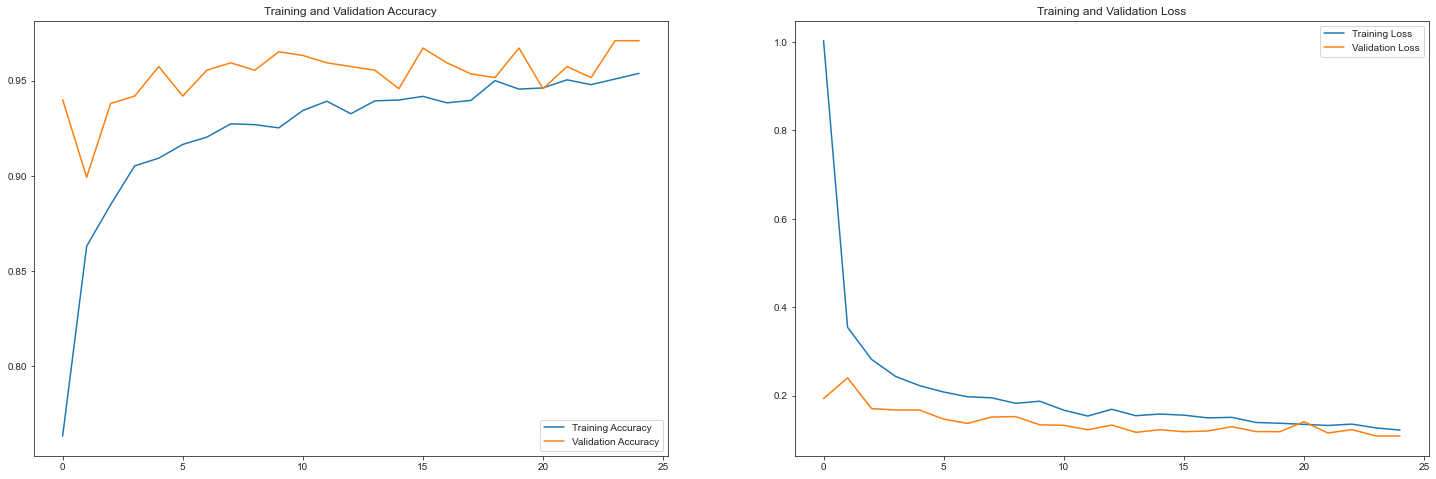

In [35]:
# fully understanding zca whitening would quite the task to undertake. Thankfully we dont need to for us to see if it helps. 
# > best score     : loss: 0.1275 - acc: 0.9525 - auc: 0.9847 - recall: 0.8912 - precision: 0.9043 - val_loss: 0.1161 - val_acc: 0.9612 - val_auc: 0.9919 - val_recall: 0.9512 - val_precision: 0.9669
# > previous score : loss: 0.1388 - acc: 0.9453 - auc: 0.9824 - recall: 0.8758 - precision: 0.8887 - val_loss: 0.1606 - val_acc: 0.9438 - val_auc: 0.9903 - val_recall: 0.8902 - val_precision: 0.9910
# > new score      : loss: 0.1221 - acc: 0.9538 - auc: 0.9865 - recall: 0.9021 - precision: 0.9005 - val_loss: 0.1087 - val_acc: 0.9709 - val_auc: 0.9935 - val_recall: 0.9512 - val_precision: 0.9873
# a non insignificant improvement, maybe I ought to read up more on it
second_model(zca = True, horiz_flip = False)

Found 4716 images belonging to 2 classes.
Epoch 1/25
148/148 [==============================] - 47s 316ms/step - loss: 0.9645 - acc: 0.7757 - auc: 0.7522 - recall: 0.5466 - precision: 0.5512 - val_loss: 0.2347 - val_acc: 0.9012 - val_auc: 0.9797 - val_recall: 0.9553 - val_precision: 0.8545
Epoch 2/25
148/148 [==============================] - 46s 311ms/step - loss: 0.3195 - acc: 0.8734 - auc: 0.9163 - recall: 0.7090 - precision: 0.7391 - val_loss: 0.1697 - val_acc: 0.9438 - val_auc: 0.9865 - val_recall: 0.9512 - val_precision: 0.9323
Epoch 3/25
148/148 [==============================] - 46s 308ms/step - loss: 0.2516 - acc: 0.8982 - auc: 0.9469 - recall: 0.7679 - precision: 0.7908 - val_loss: 0.1689 - val_acc: 0.9360 - val_auc: 0.9903 - val_recall: 0.9756 - val_precision: 0.8989
Epoch 4/25
148/148 [==============================] - 46s 311ms/step - loss: 0.2090 - acc: 0.9162 - auc: 0.9625 - recall: 0.8169 - precision: 0.8236 - val_loss: 0.1374 - val_acc: 0.9612 - val_auc: 0.9915 - val_r

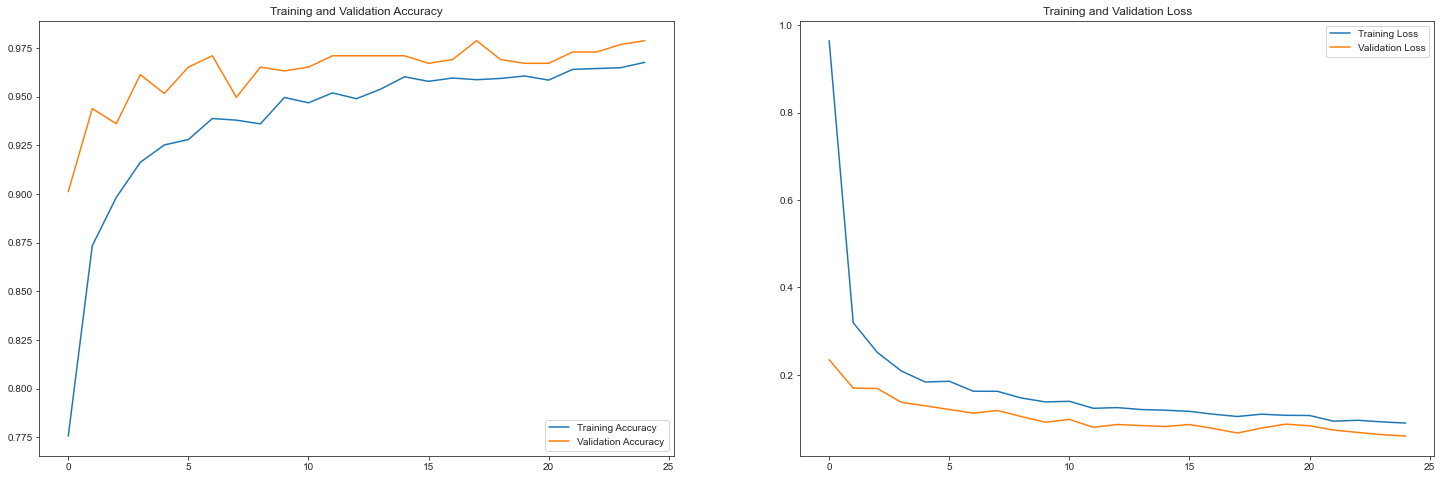

In [37]:
# many of the pictures appear zoomed in at different levels already, lets see if the variable zoom was helping or hurting our model
# > best score     : loss: 0.1221 - acc: 0.9538 - auc: 0.9865 - recall: 0.9021 - precision: 0.9005 - val_loss: 0.1087 - val_acc: 0.9709 - val_auc: 0.9935 - val_recall: 0.9512 - val_precision: 0.9873
# > previous score : loss: 0.1221 - acc: 0.9538 - auc: 0.9865 - recall: 0.9021 - precision: 0.9005 - val_loss: 0.1087 - val_acc: 0.9709 - val_auc: 0.9935 - val_recall: 0.9512 - val_precision: 0.9873
# > new score      : loss: 0.0897 - acc: 0.9676 - auc: 0.9920 - recall: 0.9275 - precision: 0.9334 - val_loss: 0.0601 - val_acc: 0.9787 - val_auc: 0.9980 - val_recall: 0.9756 - val_precision: 0.9796
# The model is much better without this feature, lets continue without it
second_model(zoom = 0,
             zca =True,
             horiz_flip = False)

Found 4716 images belonging to 2 classes.
Epoch 1/25
148/148 [==============================] - 45s 305ms/step - loss: 1.0074 - acc: 0.7827 - auc: 0.8022 - recall: 0.6168 - precision: 0.6158 - val_loss: 0.2021 - val_acc: 0.9283 - val_auc: 0.9810 - val_recall: 0.9593 - val_precision: 0.8973
Epoch 2/25
148/148 [==============================] - 44s 299ms/step - loss: 0.3032 - acc: 0.8878 - auc: 0.9261 - recall: 0.7362 - precision: 0.7733 - val_loss: 0.1660 - val_acc: 0.9457 - val_auc: 0.9889 - val_recall: 0.9715 - val_precision: 0.9192
Epoch 3/25
148/148 [==============================] - 44s 299ms/step - loss: 0.2173 - acc: 0.9116 - auc: 0.9597 - recall: 0.7906 - precision: 0.8242 - val_loss: 0.1237 - val_acc: 0.9593 - val_auc: 0.9921 - val_recall: 0.9634 - val_precision: 0.9518
Epoch 4/25
148/148 [==============================] - 44s 300ms/step - loss: 0.2094 - acc: 0.9196 - auc: 0.9603 - recall: 0.8078 - precision: 0.8422 - val_loss: 0.1178 - val_acc: 0.9593 - val_auc: 0.9935 - val_r

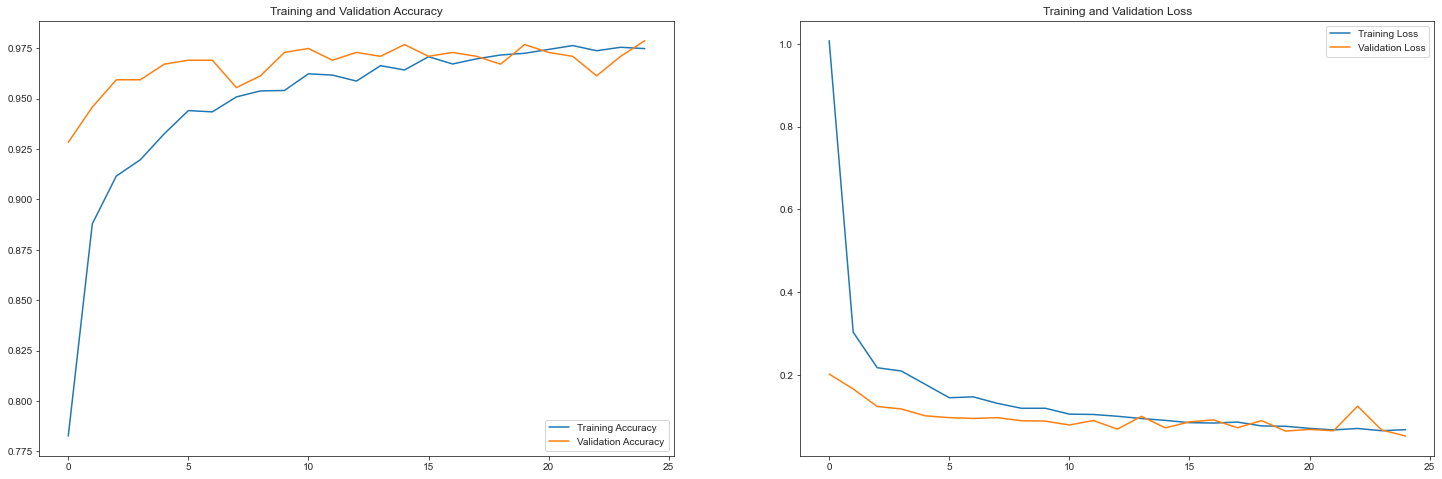

In [38]:
# fully understanding zca whitening would quite the task to undertake. Thankfully we dont need to for us to see if it helps. 
# > best score     : loss: 0.0897 - acc: 0.9676 - auc: 0.9920 - recall: 0.9275 - precision: 0.9334 - val_loss: 0.0601 - val_acc: 0.9787 - val_auc: 0.9980 - val_recall: 0.9756 - val_precision: 0.9796
# > previous score : loss: 0.0897 - acc: 0.9676 - auc: 0.9920 - recall: 0.9275 - precision: 0.9334 - val_loss: 0.0601 - val_acc: 0.9787 - val_auc: 0.9980 - val_recall: 0.9756 - val_precision: 0.9796
# > new score      : loss: 0.0677 - acc: 0.9748 - auc: 0.9955 - recall: 0.9374 - precision: 0.9539 - val_loss: 0.0523 - val_acc: 0.9787 - val_auc: 0.9985 - val_recall: 0.9878 - val_precision: 0.9681
# Looks like I was wrong on this one, turning this off significantly increased preformance
second_model(rotate = 0,
             zoom = 0,
             zca =True,
             horiz_flip = False)

# Increasing Resolution

In [39]:
# lets try increasing the resolution of the model to 128x128

In [40]:
def third_model(activation = 'swish', last_activation = 'sigmoid', epochs = 25,
                batch_size = 32, vert_flip = False, horiz_flip = True, zca = True,
                zoom = 0, rotate = 0, width_shift = .1, height_shift = .1, shuffle = True,
                res = 128, save = False):  
    
    training_generator = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        zca_whitening                 = zca,
        rotation_range                = rotate,
        zoom_range                    = zoom,
        width_shift_range             = width_shift,
        height_shift_range            = height_shift,
        horizontal_flip               = horiz_flip,
        vertical_flip                 = vert_flip,
        )
    
    validation_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
    val_generator = validation_generator.flow_from_directory(val_dir,
                                                         target_size = (res,res),
                                                         batch_size  = batch_size,
                                                         classes     = class_names,
                                                         class_mode  = 'binary')

    train_generator = training_generator.flow_from_directory(train_dir,
                                                             target_size      = (res,res),
                                                             batch_size       = batch_size,
                                                             class_mode       = 'binary',
                                                             classes          = class_names,
                                                             shuffle          = True,
                                                        )
    
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(3,3), input_shape = (res,res,3), activation = activation),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Conv2D(64,(3,3), activation = activation),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
    
        tf.keras.layers.Conv2D(128,(3,3), activation = activation),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
    
        tf.keras.layers.Conv2D(256,(3,3), activation = activation),
        tf.keras.layers.MaxPooling2D(2,2),
          
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256,activation = activation),
        tf.keras.layers.Dense(1,activation   = last_activation)  
    ])
      
    model.compile(optimizer = tf.keras.optimizers.Nadam(lr      = 0.0001,
                                                        beta_1  = 0.9,
                                                        beta_2  = 0.999,
                                                        epsilon = 1e-08,
                                                        decay   = 0.0),
                      loss    = 'binary_crossentropy',
                      metrics = (['acc'], [auc], [rec], [prec]))
    
    with tf.device('/device:GPU:0'):
        history = model.fit(train_generator,
                            validation_data = val_generator,
                            epochs          = epochs,
                            batch_size      = batch_size,
                            verbose         = 1)
    
    plotter(history, epochs)

Found 516 images belonging to 2 classes.
Found 4716 images belonging to 2 classes.
Epoch 1/25
148/148 [==============================] - 49s 331ms/step - loss: 0.9470 - acc: 0.8009 - auc: 0.8244 - recall: 0.6434 - precision: 0.6492 - val_loss: 0.2021 - val_acc: 0.9341 - val_auc: 0.9777 - val_recall: 0.9431 - val_precision: 0.9206
Epoch 2/25
148/148 [==============================] - 49s 328ms/step - loss: 0.2820 - acc: 0.8861 - auc: 0.9291 - recall: 0.7253 - precision: 0.7737 - val_loss: 0.1875 - val_acc: 0.9341 - val_auc: 0.9834 - val_recall: 0.9024 - val_precision: 0.9569
Epoch 3/25
148/148 [==============================] - 49s 328ms/step - loss: 0.2126 - acc: 0.9156 - auc: 0.9600 - recall: 0.7915 - precision: 0.8386 - val_loss: 0.1532 - val_acc: 0.9457 - val_auc: 0.9880 - val_recall: 0.9593 - val_precision: 0.9291
Epoch 4/25
148/148 [==============================] - 48s 328ms/step - loss: 0.1869 - acc: 0.9266 - auc: 0.9682 - recall: 0.8323 - precision: 0.8508 - val_loss: 0.1357 - 

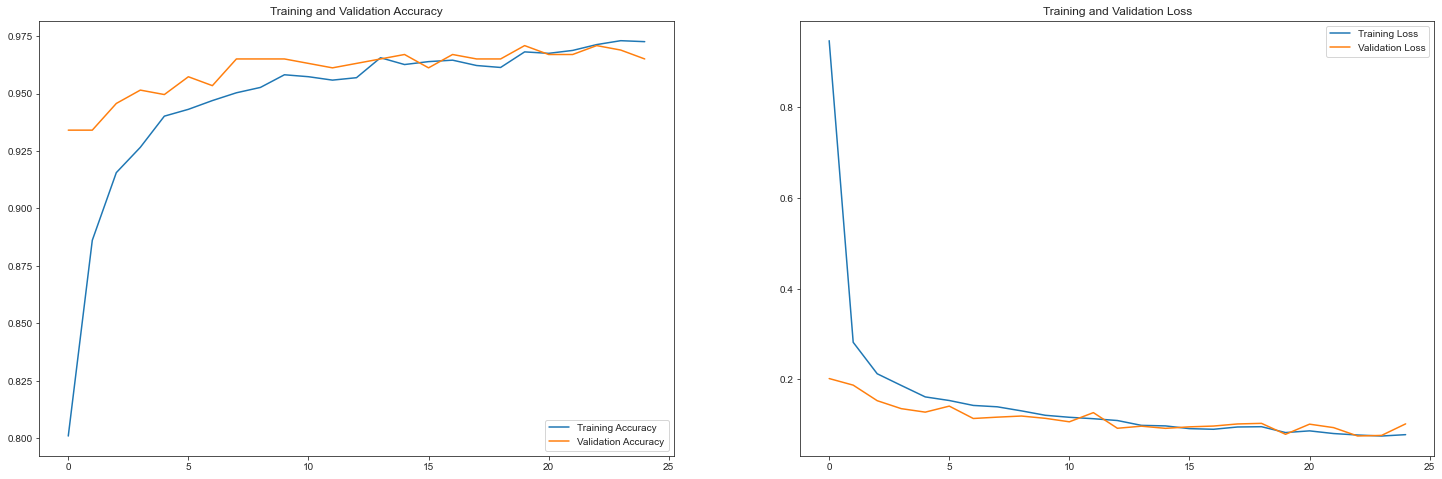

In [41]:
# lets try the model using a resolution of 128 
# > best score     : loss: 0.0677 - acc: 0.9748 - auc: 0.9955 - recall: 0.9374 - precision: 0.9539 - val_loss: 0.0523 - val_acc: 0.9787 - val_auc: 0.9985 - val_recall: 0.9878 - val_precision: 0.9681
# > previous score : 
# > new score      : loss: 0.0784 - acc: 0.9726 - auc: 0.9936 - recall: 0.9374 - precision: 0.9452 - val_loss: 0.1021 - val_acc: 0.9651 - val_auc: 0.9954 - val_recall: 0.9309 - val_precision: 0.9957
# not much of a difference. lets increase the resolution one step further to verify
third_model(res = 128)

Found 516 images belonging to 2 classes.
Found 4716 images belonging to 2 classes.
Epoch 1/25
148/148 [==============================] - 77s 521ms/step - loss: 2.3667 - acc: 0.7922 - auc: 0.7945 - recall: 0.5463 - precision: 0.6563 - val_loss: 0.3555 - val_acc: 0.8779 - val_auc: 0.9801 - val_recall: 0.7480 - val_precision: 0.9946
Epoch 2/25
148/148 [==============================] - 77s 518ms/step - loss: 0.2627 - acc: 0.8940 - auc: 0.9368 - recall: 0.7425 - precision: 0.7913 - val_loss: 0.2375 - val_acc: 0.9380 - val_auc: 0.9836 - val_recall: 0.8902 - val_precision: 0.9777
Epoch 3/25
148/148 [==============================] - 77s 518ms/step - loss: 0.2135 - acc: 0.9169 - auc: 0.9582 - recall: 0.8042 - precision: 0.8344 - val_loss: 0.2071 - val_acc: 0.9360 - val_auc: 0.9842 - val_recall: 0.9024 - val_precision: 0.9610
Epoch 4/25
148/148 [==============================] - 77s 518ms/step - loss: 0.2699 - acc: 0.9160 - auc: 0.9464 - recall: 0.8114 - precision: 0.8264 - val_loss: 0.2125 - 

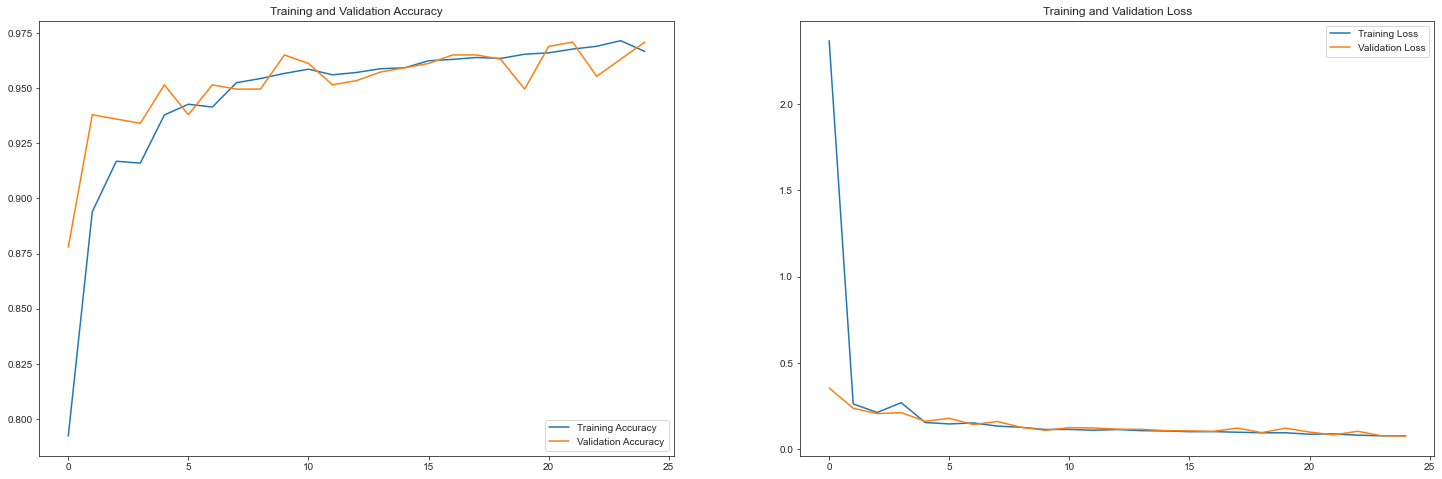

In [42]:
# lets see if we can see even better results using res = 256
# > best score     : loss: 0.0677 - acc: 0.9748 - auc: 0.9955 - recall: 0.9374 - precision: 0.9539 - val_loss: 0.0523 - val_acc: 0.9787 - val_auc: 0.9985 - val_recall: 0.9878 - val_precision: 0.9681
# > previous score : loss: 0.0784 - acc: 0.9726 - auc: 0.9936 - recall: 0.9374 - precision: 0.9452 - val_loss: 0.1021 - val_acc: 0.9651 - val_auc: 0.9954 - val_recall: 0.9309 - val_precision: 0.9957
# > new score      : loss: 0.0786 - acc: 0.9667 - auc: 0.9941 - recall: 0.9347 - precision: 0.9238 - val_loss: 0.0769 - val_acc: 0.9709 - val_auc: 0.9971 - val_recall: 0.9756 - val_precision: 0.9639
# The model is starting to take noticeably longer now, and the improvement is a small again
third_model(res = 256)

Found 516 images belonging to 2 classes.
Found 4716 images belonging to 2 classes.
Epoch 1/25
590/590 [==============================] - 197s 334ms/step - loss: 1.9372 - acc: 0.8802 - auc: 0.9139 - recall: 0.7784 - precision: 0.7889 - val_loss: 7.7749 - val_acc: 0.4767 - val_auc: 0.4898 - val_recall: 1.0000 - val_precision: 0.4767
Epoch 2/25
590/590 [==============================] - 197s 334ms/step - loss: 0.1863 - acc: 0.9304 - auc: 0.9691 - recall: 0.8386 - precision: 0.8605 - val_loss: 1.8356 - val_acc: 0.5252 - val_auc: 0.7880 - val_recall: 0.0041 - val_precision: 1.0000
Epoch 3/25
590/590 [==============================] - 197s 334ms/step - loss: 0.1522 - acc: 0.9423 - auc: 0.9779 - recall: 0.8649 - precision: 0.8858 - val_loss: 2.9071 - val_acc: 0.5233 - val_auc: 0.6651 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/25
590/590 [==============================] - 197s 334ms/step - loss: 0.1301 - acc: 0.9502 - auc: 0.9834 - recall: 0.8921 - precision: 0.8945 - val_los

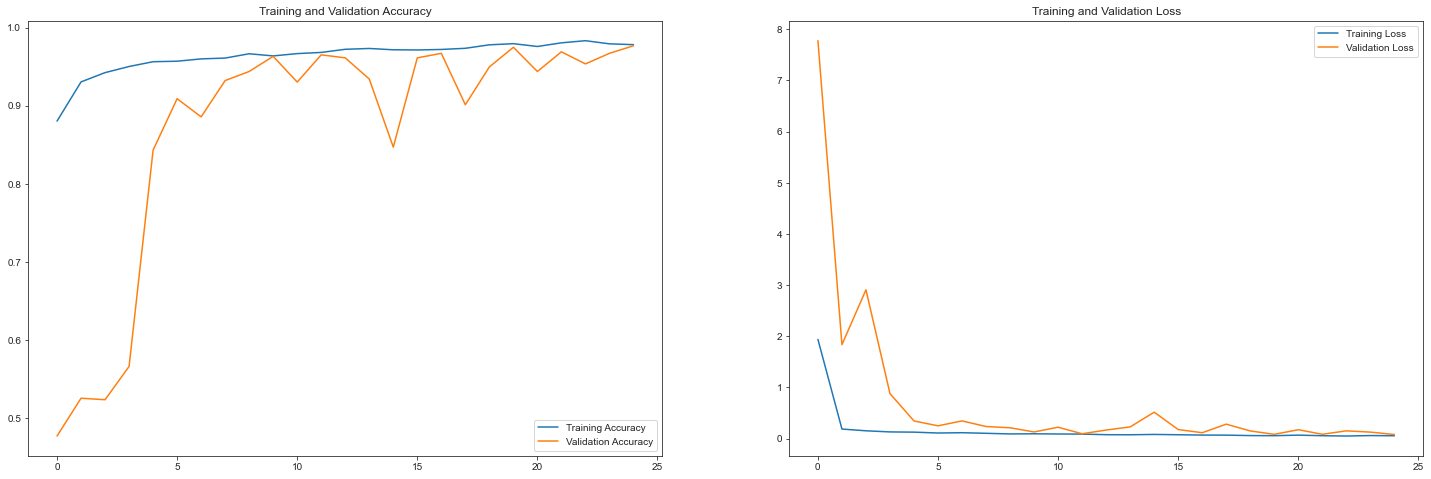

In [43]:
# Lets check the preformance of res = 512 to make sure the performance increase has taperd off
# > best score     : loss: 0.0677 - acc: 0.9748 - auc: 0.9955 - recall: 0.9374 - precision: 0.9539 - val_loss: 0.0523 - val_acc: 0.9787 - val_auc: 0.9985 - val_recall: 0.9878 - val_precision: 0.9681
# > previous score : loss: 0.0786 - acc: 0.9667 - auc: 0.9941 - recall: 0.9347 - precision: 0.9238 - val_loss: 0.0769 - val_acc: 0.9709 - val_auc: 0.9971 - val_recall: 0.9756 - val_precision: 0.9639
# > new score      : loss: 0.0550 - acc: 0.9782 - auc: 0.9970 - recall: 0.9483 - precision: 0.9579 - val_loss: 0.0793 - val_acc: 0.9767 - val_auc: 0.9944 - val_recall: 0.9553 - val_precision: 0.9958
# The model is starting to take noticeably longer now, but now we can see noticable performance gains at this resolution level
# I have to lower the batch size to 8 from the default 32 as the larger image size requires more ram than my system has available
third_model(res = 512, batch_size = 8)

Found 516 images belonging to 2 classes.
Found 4716 images belonging to 2 classes.
Epoch 1/75
590/590 [==============================] - 206s 349ms/step - loss: 1.7510 - acc: 0.8844 - auc: 0.8476 - recall: 0.6836 - precision: 0.7694 - val_loss: 13.5499 - val_acc: 0.4767 - val_auc: 0.4896 - val_recall: 1.0000 - val_precision: 0.4767
Epoch 2/75
590/590 [==============================] - 221s 375ms/step - loss: 0.1840 - acc: 0.9317 - auc: 0.9689 - recall: 0.8468 - precision: 0.8592 - val_loss: 6.4189 - val_acc: 0.4767 - val_auc: 0.3951 - val_recall: 1.0000 - val_precision: 0.4767
Epoch 3/75
590/590 [==============================] - 226s 384ms/step - loss: 0.1757 - acc: 0.9349 - auc: 0.9713 - recall: 0.8504 - precision: 0.8685 - val_loss: 1.3708 - val_acc: 0.6085 - val_auc: 0.5290 - val_recall: 0.8943 - val_precision: 0.5556
Epoch 4/75
590/590 [==============================] - 227s 385ms/step - loss: 0.1590 - acc: 0.9385 - auc: 0.9772 - recall: 0.8622 - precision: 0.8733 - val_loss: 0.48

590/590 [==============================] - 198s 336ms/step - loss: 0.0417 - acc: 0.9849 - auc: 0.9981 - recall: 0.9701 - precision: 0.9657 - val_loss: 0.0975 - val_acc: 0.9729 - val_auc: 0.9943 - val_recall: 0.9472 - val_precision: 0.9957
Epoch 34/75
590/590 [==============================] - 198s 336ms/step - loss: 0.0397 - acc: 0.9871 - auc: 0.9980 - recall: 0.9755 - precision: 0.9694 - val_loss: 0.0825 - val_acc: 0.9767 - val_auc: 0.9937 - val_recall: 0.9634 - val_precision: 0.9875
Epoch 35/75
590/590 [==============================] - 198s 336ms/step - loss: 0.0426 - acc: 0.9845 - auc: 0.9976 - recall: 0.9710 - precision: 0.9631 - val_loss: 0.0980 - val_acc: 0.9709 - val_auc: 0.9940 - val_recall: 0.9553 - val_precision: 0.9833
Epoch 36/75
590/590 [==============================] - 198s 336ms/step - loss: 0.0426 - acc: 0.9866 - auc: 0.9974 - recall: 0.9728 - precision: 0.9702 - val_loss: 0.1438 - val_acc: 0.9554 - val_auc: 0.9899 - val_recall: 0.9228 - val_precision: 0.9827
Epoch 37

Epoch 66/75
590/590 [==============================] - 211s 358ms/step - loss: 0.0234 - acc: 0.9909 - auc: 0.9991 - recall: 0.9810 - precision: 0.9801 - val_loss: 0.1180 - val_acc: 0.9709 - val_auc: 0.9956 - val_recall: 0.9390 - val_precision: 1.0000
Epoch 67/75
590/590 [==============================] - 209s 354ms/step - loss: 0.0317 - acc: 0.9892 - auc: 0.9987 - recall: 0.9791 - precision: 0.9747 - val_loss: 0.1885 - val_acc: 0.9535 - val_auc: 0.9870 - val_recall: 0.9024 - val_precision: 1.0000
Epoch 68/75
590/590 [==============================] - 209s 355ms/step - loss: 0.0199 - acc: 0.9924 - auc: 0.9995 - recall: 0.9855 - precision: 0.9819 - val_loss: 0.0976 - val_acc: 0.9709 - val_auc: 0.9955 - val_recall: 0.9390 - val_precision: 1.0000
Epoch 69/75
590/590 [==============================] - 209s 354ms/step - loss: 0.0210 - acc: 0.9919 - auc: 0.9995 - recall: 0.9837 - precision: 0.9819 - val_loss: 0.1719 - val_acc: 0.9767 - val_auc: 0.9891 - val_recall: 0.9593 - val_precision: 0.9

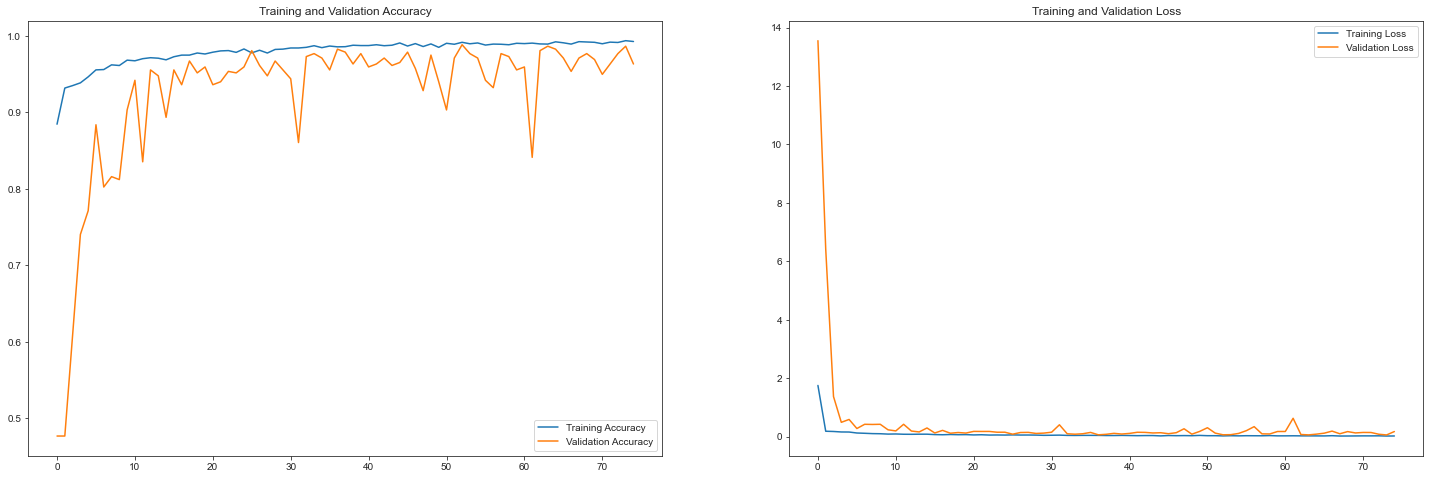

In [54]:
# Lets check the preformance of res = 512 to make sure the performance increase has taperd off
# > best score     : 0.0550 - acc: 0.9782 - auc: 0.9970 - recall: 0.9483 - precision: 0.9579 - val_loss: 0.0793 - val_acc: 0.9767 - val_auc: 0.9944 - val_recall: 0.9553 - val_precision: 0.9958
# > previous score : 0.0550 - acc: 0.9782 - auc: 0.9970 - recall: 0.9483 - precision: 0.9579 - val_loss: 0.0793 - val_acc: 0.9767 - val_auc: 0.9944 - val_recall: 0.9553 - val_precision: 0.9958
# > new score      : 
# 
# The model is starting to take noticeably longer now, and the improvement is a much smaller jump compared to 96 to 128,
third_model(res = 512,
            epochs = 75,
            batch_size = 8)

# Adding layers

In [45]:
# Final Model
# Including three additional BatchNormalization layers
# > best score     : loss: 0.0550 - acc: 0.9782 - auc: 0.9970 - recall: 0.9483 - precision: 0.9579 - val_loss: 0.0793 - val_acc: 0.9767 - val_auc: 0.9944 - val_recall: 0.9553 - val_precision: 0.9958
# > previous score : 
# > new score      : loss: 0.0054 - acc: 0.9989 - auc: 0.9995 - recall: 0.9982 - precision: 0.9973 - val_loss: 0.2691 - val_acc: 0.9806 - val_auc: 0.9820 - val_recall: 0.9675 - val_precision: 0.9917
# adding BatchNormalization layers have given us our biggest performance increase yet
# we were able to achieve comprable performance to our previous 135 epochs in just 10!

Found 4716 images belonging to 2 classes.
Found 516 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/25
590/590 [==============================] - 124s 210ms/step - loss: 0.2531 - acc: 0.9506 - auc: 0.9530 - recall: 0.8601 - precision: 0.8929 - val_loss: 0.0996 - val_acc: 0.9593 - val_auc: 0.9953 - val_recall: 0.9878 - val_precision: 0.9310 loss: 0.8919 - acc: 0.9042 - auc: 0.8757 - rec - ETA: 58s - loss: 0.3971 - acc: 0.9339 - auc:  - ETA: 32s - loss: 0.3160 - acc: 0.9432 - auc: 0.9427 - r
Epoch 2/25
590/590 [==============================] - 125s 211ms/step - loss: 0.6210 - acc: 0.9514 - auc: 0.9553 - recall: 0.9003 - precision: 0.8930 - val_loss: 0.4049 - val_acc: 0.9671 - val_auc: 0.9778 - val_recall: 0.9675 - val_precision: 0.9636
Epoch 3/25
590/590 [==============================] - 125s 211ms/step - loss: 0.2146 - acc: 0.9731 - auc: 0.9795 - recall: 0.9456 - precision: 0.9396 - val_loss: 0.1325 - val_acc: 0.9767 - val_auc: 0.9897 - val_recall: 0.98

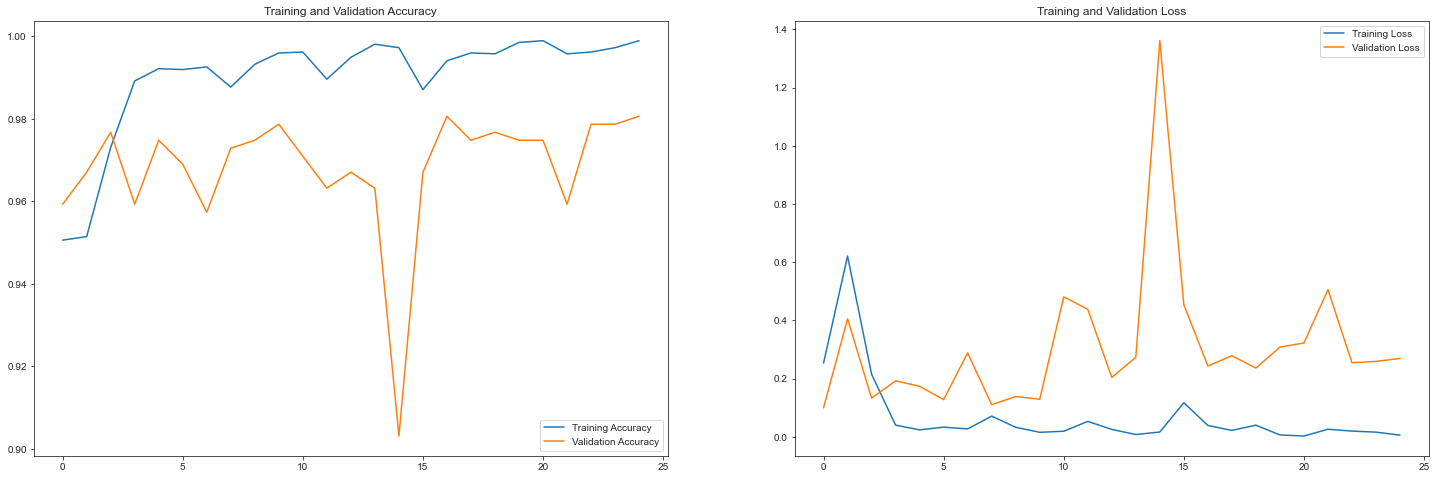

In [52]:
res = 512
batch_size = 8
epochs = 25


training_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
        rotation_range                = 30,
        zca_whitening                 = True,
        zoom_range                    = 0.2,
        width_shift_range             = 0.1,
        height_shift_range            = 0.1,
        horizontal_flip               = True,
        vertical_flip                 = False)

training_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator = training_generator.flow_from_directory(train_dir,
                                                         target_size      = (res,res),
                                                         batch_size       = batch_size,
                                                         class_mode       = 'binary',
                                                         classes          = class_names,
                                                         shuffle          = True,
                                                        )
    
validation_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = validation_generator.flow_from_directory(val_dir,
                                                         target_size = (res,res),
                                                         batch_size  = batch_size,
                                                         classes     = class_names,
                                                         class_mode  = 'binary'
                                                        )
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_generator.flow_from_directory(test_dir,
                                                    target_size = (res,res),
                                                    batch_size  = batch_size,
                                                    classes     = class_names,
                                                    class_mode  = 'binary'
                                                   )


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), input_shape = (res,res,3), activation = 'swish'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation = 'swish'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation = 'swish'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3), activation = 'swish'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
          
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation = 'swish'),
    tf.keras.layers.Dense(1,activation   = 'sigmoid')  
])
      
model.compile(optimizer = tf.keras.optimizers.Nadam(lr      = 0.0001,
                                                    beta_1  = 0.9,
                                                    beta_2  = 0.999,
                                                    epsilon = 1e-08,
                                                    decay   = 0.0),
              loss    = 'binary_crossentropy',
              metrics = (['acc'], [auc], [rec], [prec]))
    
with tf.device('/device:GPU:0'):
    history = model.fit(train_generator,
                        validation_data = val_generator,
                        epochs          = epochs,
                        batch_size      = batch_size,
                        verbose         = 1)
    
plotter(history, epochs)